In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier


In [ ]:
obesity = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic 2.csv')
obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
target = 'NObeyesdad'
features = ['Age','Height','Weight']

In [ ]:
X = obesity[features]
y = obesity[target]

X = X.fillna(0)
y = y.fillna(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9550827423167849


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score

In [ ]:
# Define cross-validation technique
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models and parameters
RF = RandomForestClassifier(random_state=42)


# set models in a dictionary
models = [
    RF
]

In [ ]:
# scoring model
score = 'accuracy' # other options: 'precision', 'recall', 'f1'
RF_cv_results = cross_validate(RF, X, y, cv=cv, scoring=score)


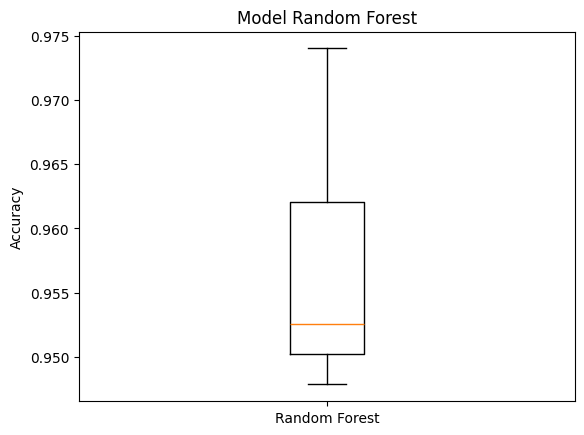

In [ ]:
# get the score results
RF_scores = RF_cv_results['test_score']


# visualize the results
models = ['Random Forest']
scores = [RF_scores]
plt.boxplot(scores, tick_labels=models)
plt.ylabel('Accuracy')
plt.title('Model Random Forest')
plt.show()

In [ ]:
# Use the list of model objects defined in cell wlFxgxniKAX5
for m in [RF]:
    print(m.__class__.__name__) # Print the model name
    cv_scores = cross_val_score(m, X, y, cv=cv, scoring='f1_weighted') # Use f1_weighted for multi-class classification

    display(pd.DataFrame(cv_scores).describe().T)

RandomForestClassifier


,count,mean,std,min,25%,50%,75%,max
0,5.0,0.957457,0.010612,0.948071,0.950484,0.952744,0.962098,0.973889


In [ ]:
# Print accuracy, precision, f1 score, recall
for m in [RF]:
    print(m.__class__.__name__) # Print the model name
    # Calculate cross-validation scores for multiple metrics
    cv_results = cross_validate(m, X, y, cv=cv, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

    print("Accuracy: %0.2f (+/- %0.2f)" % (cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std() * 2))
    print("Precision: %0.2f (+/- %0.2f)" % (cv_results['test_precision_weighted'].mean(), cv_results['test_precision_weighted'].std() * 2))
    print("F1 Score: %0.2f (+/- %0.2f)" % (cv_results['test_f1_weighted'].mean(), cv_results['test_f1_weighted'].std() * 2))
    print("Recall: %0.2f (+/- %0.2f)" % (cv_results['test_recall_weighted'].mean(), cv_results['test_recall_weighted'].std() * 2))
    print()

RandomForestClassifier
Accuracy: 0.96 (+/- 0.02)
Precision: 0.96 (+/- 0.02)
F1 Score: 0.96 (+/- 0.02)
Recall: 0.96 (+/- 0.02)



RandomForestClassifier


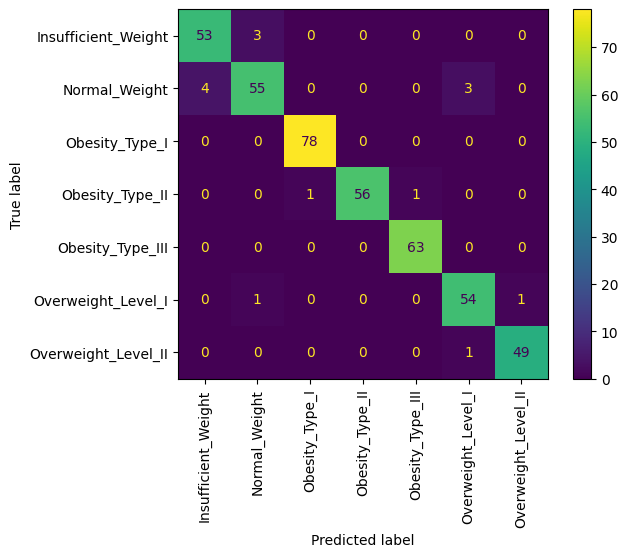

In [ ]:
# Confusion matrix
for m in [RF]:
    print(m.__class__.__name__) # Print the model name
    m
    y_pred = m.fit(X_train, y_train).predict(X_test)
    ConfusionMatrixDisplay.from_estimator(m, X_test, y_test, display_labels=m.classes_, xticks_rotation='vertical')
    plt.show()
